In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Bibilothèques

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [56]:
# fonction helper pour afficher plusieurs courbe ROC sur une même figure
def plot_roc_curve(y_train, results):
    plt.figure().clear()
    for key in results:
        fpr, tpr, thresholds = roc_curve(y_train, results[key], drop_intermediate=False)
        auc = roc_auc_score(y_train, results[key])
        plt.plot(fpr, tpr, label = key +', auc = '+str(auc))
    plt.legend(loc=4)        

# Lecture et exploration des données

In [4]:
donnees = pd.read_csv('../../data/chansons.csv')

In [5]:
# Tailles du jeux de données
donnees.shape

(7574, 39)

In [6]:
# Affichages des 10 premières lignes de données pour en avoir une idée
donnees.head(10)

,annee,titre,artiste,chansonID,artisteID,signature_temp,signature_temp_confiance,intensite,tempo,tempo_confiance,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
5,2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,...,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0
6,2010,All Signs Point to Lauderdale,A Day to Remember,SODZEHH1377566C93F,AROBSHL1187B9AFB01,4,0.968,-4.114,149.967,0.273,...,97.938,-57.289,34.989,-35.724,72.925,-66.070,75.881,-51.232,28.741,0
7,2010,Out of Time,A Day to Remember,SOJQXRI12C5664F058,AROBSHL1187B9AFB01,4,0.861,-3.683,160.328,0.830,...,114.817,-56.108,25.915,-69.726,112.780,-117.207,27.494,-50.713,31.470,0
8,2010,If I Leave,A Day to Remember,SOWCXMH137733DA46E,AROBSHL1187B9AFB01,4,0.622,-4.967,155.112,0.018,...,67.466,-53.234,40.445,-33.081,50.643,-61.121,50.245,-53.695,26.625,0
9,2010,Whataya Want From Me,Adam Lambert,SOFOBLL13A9E22142F,ARIGTAO11FED0C4411,4,0.938,-15.557,95.904,0.929,...,99.150,-69.346,56.233,-94.733,62.789,-102.870,65.328,-48.411,47.376,1


In [7]:
# Statistiques descriptives des colonnees numériques du jeu de données
donnees.describe()

,annee,signature_temp,signature_temp_confiance,intensite,tempo,tempo_confiance,gamme,gamme_confiance,energie,hauteur,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


In [8]:
# Statistiques descriptives des colonnes catégoriques
donnees.describe(exclude='number')

,titre,artiste,chansonID,artisteID
count,7574,7574,7574,7574
unique,7141,1032,7549,1047
top,Intro,Various artists,SOKLHIK131343A2E06,ARAGWS81187FB3F768
freq,15,162,2,222


In [9]:
# NB: Nous n'observons aucune valeur manquante au regard des statistiques précédentes

In [10]:
#g = sns.PairGrid(donnees.select_dtypes(include='number'))
#g = g.map(sns.scatterplot)

# Préparation des données

In [11]:
# Au regard du nombre très élévé de valeurs possibles pour les variables catégoriques (titre, artiste, chansonID et artisteID),
# nous allons nous passer de ces variables dans nos modèles pour éviter le fleaux de la dimension.
donnees_numerique = donnees.select_dtypes(exclude='object')
#donnees_numerique

In [12]:
# Variables explicatives et variable expliquée
X = donnees_numerique.drop('Top10', axis=1)
y = donnees_numerique['Top10']

In [13]:
# Normalisation des variables explicatives: malgré la différence d'échelle qui n'est pas significative entre les valeurs,
# nous allons normaliser nos variables explicatives
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Séparation des données en Train-Test

In [14]:
# Observation sur le débalancement des classes: Proportition de la classe positive(1) vs classe négative(0)
prop_classe_positive = y.sum() / len(y)
print(f'Proportition de la classe positive = {prop_classe_positive}')

Proportition de la classe positive = 0.14774227620808028


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=2023, shuffle=True, test_size=0.3)

# Modélisation
Pour chacun des modèles (sauf le baseline), nous allons utiliser la recherche aléatoire pour trouver les meilleurs hyperparametres.

## Modèle baseline

In [16]:
baseline_cf = DummyClassifier(strategy='most_frequent')
baseline_cf.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

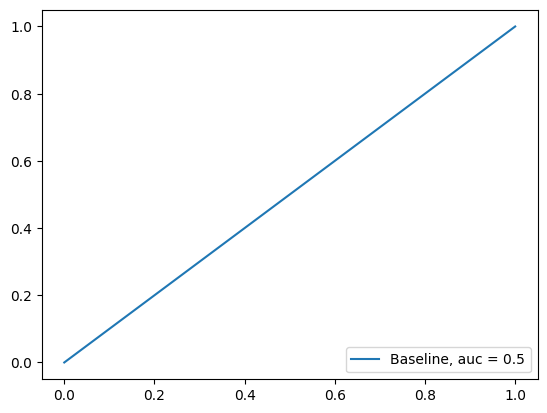

In [17]:
# Score sur l'ensemble des données d'entrainement: Courbe ROC et AUC
results = {}
y_pred_proba_baseline = baseline_cf.predict_proba(X_train)[:,1]
results['Baseline'] = y_pred_proba_baseline

plot_roc_curve(y_train, results)

## Regression logistique avec recherche aléatoire des meilleurs hyperparamètres

In [18]:
# Estimateur
lg_reg = LogisticRegression(penalty='elasticnet', solver='saga', n_jobs=-1, max_iter=10000, random_state=2023)

In [19]:
#- choix des meilleurs hyperparamètres,
#- Régularisation,
#- bagging, 
#- boosting

# Parametre grille
#param_grid = {'C': [1e-2, 1e-1, 0.3, 1e-0, 10, 76, 100], 'l1_ratio' : [0, 0.5, 1]}

# Recherche aléatoire
#log_reg_grid_search = GridSearchCV(lg_reg, param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# fit grille
#log_reg_grid_search.fit(X_train, y_train)

#print(f'Le meilleur score grille est (auc moyen) : {log_reg_grid_search.best_score_}')
#print(f'Les meilleurs paramètres grille sont: {log_reg_grid_search.best_params_}')

# Score sur l'ensemble des données d'entrainement: Courbe ROC et AUC
#y_train_pred_proba_lg_reg = log_reg_grid_search.best_estimator_.predict_proba(X_train)[:,1]
#results['Regression logistique grille'] = y_train_pred_proba_lg_reg

#plot_roc_curve(y_train, results)

In [20]:
# Paramètres de la recherche aléatoire
param_rnd_search = dict(C = loguniform(1e-20, 1e2), l1_ratio = loguniform(10e-10,1))

# Recherche aléatoire
log_reg_rnd_search = RandomizedSearchCV(lg_reg, 
                                        param_rnd_search, 
                                        n_iter=50, 
                                        scoring='roc_auc', 
                                        cv=5, 
                                        verbose=1, 
                                        n_jobs=-1,
                                        random_state=2023)

In [21]:
# fit 
log_reg_rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                                penalty='elasticnet',
                                                random_state=2023,
                                                solver='saga'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7feeec976590>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7feeec8e8250>},
                   random_state=2023, scoring='roc_auc', verbose=1)

In [22]:
print(f'Le meilleur score est (auc moyen) : {log_reg_rnd_search.best_score_}')
print(f'Les meilleurs paramètres sont: {log_reg_rnd_search.best_params_}')

Le meilleur score est (auc moyen) : 0.816747031968433
Les meilleurs paramètres sont: {'C': 76.23533075219207, 'l1_ratio': 0.006034356866200069}


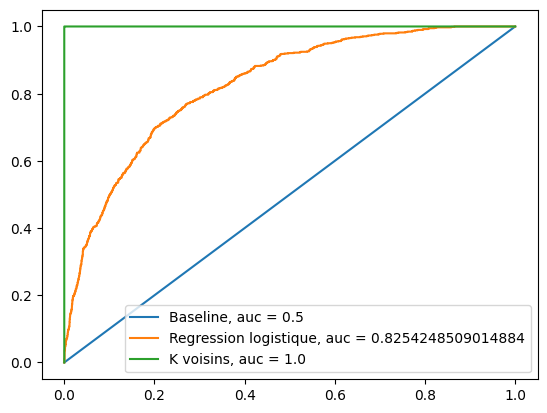

In [57]:
# Score sur l'ensemble des données d'entrainement: Courbe ROC et AUC
y_train_pred_proba_lg_reg_rnd = log_reg_rnd_search.best_estimator_.predict_proba(X_train)[:,1]
results['Regression logistique'] = y_train_pred_proba_lg_reg_rnd

plot_roc_curve(y_train, results)

In [54]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba_lg_reg_rnd)
auc = roc_auc_score(y_train, y_train_pred_proba_lg_reg_rnd)
len(thresholds)

1037

## K plus proche voisin

In [37]:
#- choix des meilleurs hyperparamètres,
#- bagging, 
#- boosting

# Estimateur
knn_cf = KNeighborsClassifier(n_jobs=-1)

In [42]:
# Paramètres de la recherche aléatoire
param_rnd_search = dict(n_neighbors = randint(5, 50), weights = ['uniform', 'distance'])

# Recherche aléatoire
knn_rnd_search = RandomizedSearchCV(knn_cf, 
                                    param_rnd_search, 
                                    n_iter=14, 
                                    scoring='roc_auc', 
                                    cv=5, 
                                    verbose=1, 
                                    n_jobs=-1,
                                    random_state=2023)

In [43]:
# fit 
knn_rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=14,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fef48e17880>,
                                        'weights': ['uniform', 'distance']},
                   random_state=2023, scoring='roc_auc', verbose=1)

In [44]:
print(f'Le meilleur score est (auc moyen) : {knn_rnd_search.best_score_}')
print(f'Les meilleurs paramètres sont: {knn_rnd_search.best_params_}')

Le meilleur score est (auc moyen) : 0.798300634386275
Les meilleurs paramètres sont: {'n_neighbors': 45, 'weights': 'distance'}


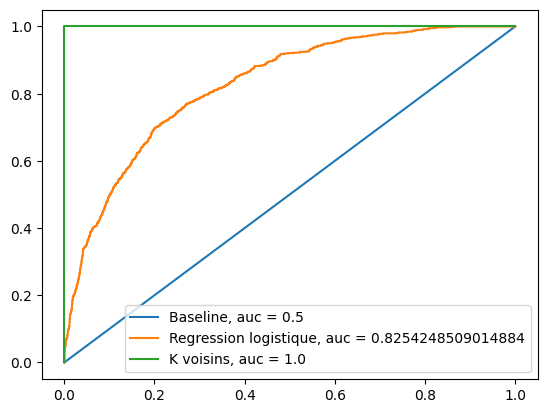

In [45]:
# Score sur l'ensemble des données d'entrainement: Courbe ROC et AUC
y_train_pred_proba_knn_rnd = knn_rnd_search.best_estimator_.predict_proba(X_train)[:,1]
results['K voisins'] = y_train_pred_proba_knn_rnd

plot_roc_curve(y_train, results)

In [55]:
#y_train_pred_proba_knn_rnd
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba_knn_rnd, drop_intermediate=False)
auc = roc_auc_score(y_train, y_train_pred_proba_knn_rnd)
len(thresholds)

1566

## Arbre de décision

In [29]:
- choix des meilleurs hyperparamètres,
- bagging, 
- boosting

SyntaxError: invalid syntax (2417815056.py, line 1)

## Forêt aléatoire

In [ ]:
- choix des meilleurs hyperparamètres,
- bagging, 
- boosting